In [1]:
import pandas as pd

politician_map = pd.read_csv('politopics/conf/map.csv')
handles = politician_map['Handle']

party_colors = []
for party in politician_map['Party']:
    if party == 'Democratic Party':
        party_colors.append('b')
    elif party == 'Republican Party':
        party_colors.append('r')
    else:
        party_colors.append('k')

In [2]:
from politopics.archive.PreProcess import *

key_terms_str = []
for handle in handles:
    try:  
        handle_obj = Preprocess(handle)
        key_terms_str.append( ' '.join(handle_obj.n_key_terms) )
    except ValueError:
        continue

01/25/2020 12:37:36 PM | INFO | Processing Tweets from RepFinkenauer
01/25/2020 12:37:36 PM | INFO | Processing Tweets from RepSpanberger
01/25/2020 12:37:37 PM | INFO | Processing Tweets from RepKinzinger
01/25/2020 12:37:37 PM | INFO | Processing Tweets from RepAdamSchiff
01/25/2020 12:37:38 PM | INFO | Processing Tweets from RepAdrianSmith
01/25/2020 12:37:38 PM | INFO | Processing Tweets from RepEspaillat
01/25/2020 12:37:39 PM | INFO | Processing Tweets from RepAlGreen
01/25/2020 12:37:39 PM | INFO | Processing Tweets from RepLowenthal
01/25/2020 12:37:40 PM | INFO | Processing Tweets from RepSires
01/25/2020 12:37:40 PM | INFO | Processing Tweets from RepAOC
01/25/2020 12:37:40 PM | INFO | Processing Tweets from SenAmyKlobuchar
01/25/2020 12:37:41 PM | INFO | Processing Tweets from RepAndreCarson
01/25/2020 12:37:41 PM | INFO | Processing Tweets from RepAndyBarr
01/25/2020 12:37:42 PM | INFO | Processing Tweets from RepAndyLevin
01/25/2020 12:37:42 PM | INFO | Processing Tweets f

01/25/2020 12:38:27 PM | INFO | Processing Tweets from RepSwalwell
01/25/2020 12:38:28 PM | INFO | Processing Tweets from RepRooney
01/25/2020 12:38:28 PM | INFO | Processing Tweets from RepFrankLucas
01/25/2020 12:38:28 PM | INFO | Processing Tweets from FrankPallone
01/25/2020 12:38:29 PM | INFO | Processing Tweets from RepFredUpton
01/25/2020 12:38:29 PM | INFO | Processing Tweets from RepFrenchHill
01/25/2020 12:38:30 PM | INFO | Processing Tweets from RepGarretGraves
01/25/2020 12:38:30 PM | INFO | Processing Tweets from USRepGaryPalmer
01/25/2020 12:38:30 PM | INFO | Processing Tweets from SenGaryPeters
01/25/2020 12:38:31 PM | INFO | Processing Tweets from RepGilCisneros
01/25/2020 12:38:31 PM | INFO | Processing Tweets from RepGrothman
01/25/2020 12:38:32 PM | INFO | Processing Tweets from RepGraceMeng
01/25/2020 12:38:32 PM | INFO | Processing Tweets from RepGregPence
01/25/2020 12:38:33 PM | INFO | Processing Tweets from RepGregStanton
01/25/2020 12:38:33 PM | INFO | Processi

01/25/2020 12:39:20 PM | INFO | Processing Tweets from SenatorHassan
01/25/2020 12:39:20 PM | INFO | Processing Tweets from RepVeasey
01/25/2020 12:39:21 PM | INFO | Processing Tweets from marcorubio
01/25/2020 12:39:21 PM | INFO | Processing Tweets from RepMarcyKaptur
01/25/2020 12:39:22 PM | INFO | Processing Tweets from SenatorCantwell
01/25/2020 12:39:22 PM | INFO | Processing Tweets from MarioDB
01/25/2020 12:39:23 PM | INFO | Processing Tweets from RepDeSaulnier
01/25/2020 12:39:23 PM | INFO | Processing Tweets from RepMarkGreen
01/25/2020 12:39:24 PM | INFO | Processing Tweets from RepMarkMeadows
01/25/2020 12:39:24 PM | INFO | Processing Tweets from repmarkpocan
01/25/2020 12:39:25 PM | INFO | Processing Tweets from RepMarkTakano
01/25/2020 12:39:25 PM | INFO | Processing Tweets from RepMarkWalker
01/25/2020 12:39:26 PM | INFO | Processing Tweets from MarkWarner
01/25/2020 12:39:26 PM | INFO | Processing Tweets from RepMullin
01/25/2020 12:39:26 PM | INFO | Processing Tweets fr

01/25/2020 12:40:13 PM | INFO | Processing Tweets from RepSylviaGarcia
01/25/2020 12:40:13 PM | INFO | Processing Tweets from SenatorBaldwin
01/25/2020 12:40:14 PM | INFO | Processing Tweets from SenDuckworth
01/25/2020 12:40:14 PM | INFO | Processing Tweets from RepTedBudd
01/25/2020 12:40:15 PM | INFO | Processing Tweets from SenTedCruz
01/25/2020 12:40:15 PM | INFO | Processing Tweets from RepTedLieu
01/25/2020 12:40:16 PM | INFO | Processing Tweets from RepTedYoho
01/25/2020 12:40:16 PM | INFO | Processing Tweets from SenThomTillis
01/25/2020 12:40:17 PM | INFO | Processing Tweets from RepThomasMassie
01/25/2020 12:40:17 PM | INFO | Processing Tweets from RepTimBurchett
01/25/2020 12:40:18 PM | INFO | Processing Tweets from timkaine
01/25/2020 12:40:18 PM | INFO | Processing Tweets from RepTimRyan
01/25/2020 12:40:18 PM | INFO | Processing Tweets from SenatorTimScott
01/25/2020 12:40:19 PM | INFO | Processing Tweets from SenTinaSmith
01/25/2020 12:40:19 PM | INFO | Processing Tweet

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.linalg import eigs
from sklearn.metrics.pairwise import cosine_similarity

def diffusion_map(key_terms_str, power, eps):
    tfidf = TfidfVectorizer()
    td_matrix = tfidf.fit_transform(key_terms_str)

    D = cosine_similarity(td_matrix, dense_output=False)
    D = D.power(power)

    eps = eps
    A = rbf_kernel(D, gamma=1./(2.*eps))
    W, V = eigs(A)
    return(W, V)

Text(0.5, 1.0, 't = 2, $\\epsilon$ = 6')

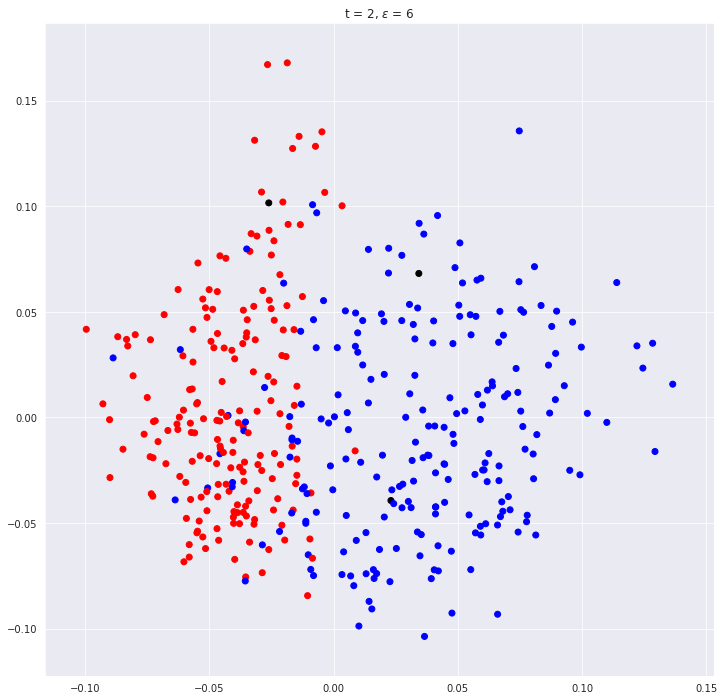

In [7]:
W, V = diffusion_map(key_terms_str, 2, 6)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

fig = plt.figure(figsize=(12,12))
sb.set_style('darkgrid')
plt.axis(scaled=True)
x = V[:,1]; y = V[:,2]
plt.scatter(x, y, c=party_colors)
plt.title('t = 2, $\epsilon$ = 6')

In [8]:
import itertools

power = [1, 3, 5]
eps   = [2, 4, 6]
params = [xs for xs in itertools.product(power, eps)]
print(params)

[(1, 2), (1, 4), (1, 6), (3, 2), (3, 4), (3, 6), (5, 2), (5, 4), (5, 6)]


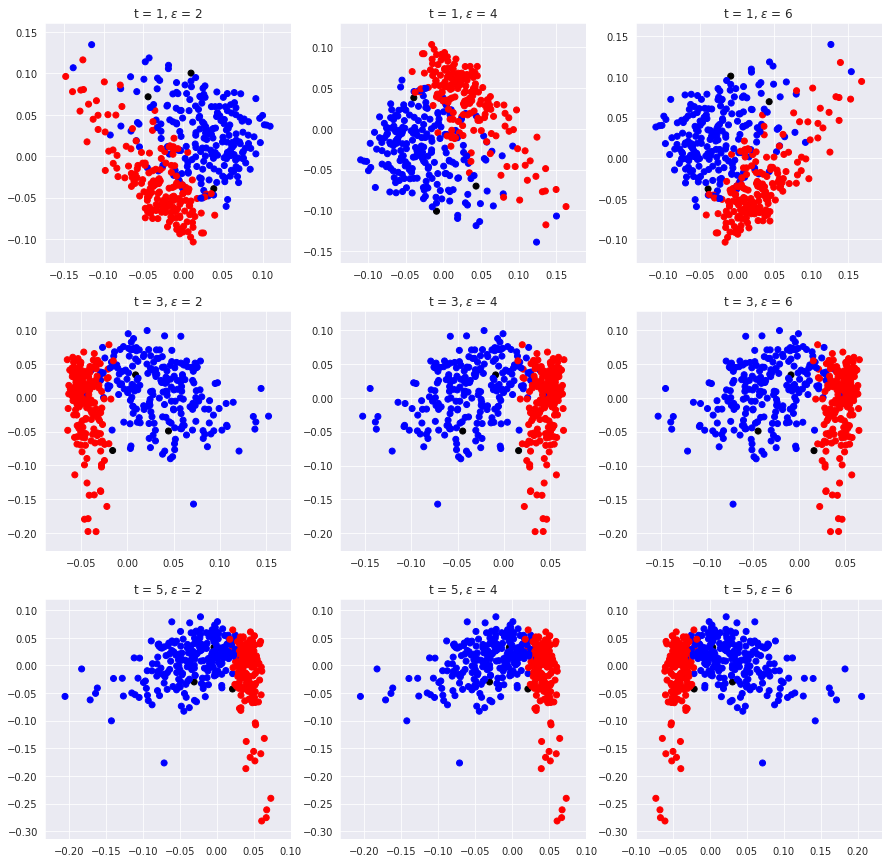

In [9]:
sb.set_style('darkgrid')
fig = plt.figure(figsize=(15,15))

for i, param in enumerate(params):
    power = param[0]
    eps   = param[1]
    W, V = diffusion_map(key_terms_str, power, eps )
    x = V[:,1]; y = V[:,2]
    plt.subplot(3, 3, i+1)
    plt.scatter(x, y, c=party_colors)
    plot_title = ', '.join(['t = ' + str(power), '$\epsilon$ = ' + str(eps)])
    plt.title(plot_title)

plt.show()